# Fake News Detection




## Objective


The objective of this assignment is to develop a Semantic Classification model. You will be using Word2Vec method to extract the semantic relations from the text and develop a basic understanding of how to train supervised models to categorise text based on its meaning, rather than just syntax. You will explore how this technique is used in situations where understanding textual meaning plays a critical role in making accurate and efficient decisions.


## Business Objective

The spread of fake news has become a significant challenge in today’s digital world. With the massive volume of news articles published daily, it’s becoming harder to distinguish between credible and misleading information. This creates a need for systems that can automatically classify news articles as true or fake, helping to reduce misinformation and protect public trust.


In this assignment, you will develop a Semantic Classification model that uses the Word2Vec method to detect recurring patterns and themes in news articles. Using supervised learning models, the goal is to build a system that classifies news articles as either fake or true.


<h2> Pipelines that needs to be performed </h2>

You need to perform the following tasks to complete the assignment:

<ol type="1">

  <li> Data Preparation
  <li> Text Preprocessing
  <li> Train Validation Split
  <li> EDA on Training Data
  <li> EDA on Validation Data [Optional]
  <li> Feature Extraction
  <li> Model Training and Evaluation

</ol>

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Dictionary


For this assignment, you will work with two datasets, `True.csv` and `Fake.csv`.
Both datasets contain three columns:
<ul>
  <li> title of the news article
  <li> text of the news article
  <li> date of article publication
</ul>

`True.csv` dataset includes 21,417 true news, while the `Fake.csv` dataset comprises 23,502 fake news.

## Installing required Libraries

In [ ]:
!pip install --upgrade numpy==1.26.4
!pip install --upgrade pandas==2.2.2
!pip install --upgrade nltk==3.9.1
!pip install --upgrade spacy==3.7.5
!pip install --upgrade scipy==1.12
!pip install --upgrade pydantic==2.10.5
!pip install wordcloud==1.9.4
!python -m spacy download en_core_web_sm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 94.9 MB/s eta 0:00:00
  Attempting uninstall: en-core-web-sm
    Found existing installation: en_core_web_sm 3.8.0
    Uninstalling en_core_web_sm-3.8.0:
      Successfully uninstalled en_core_web_sm-3.8.0
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


## Importing the necessary libraries

In [ ]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations and arrays
import pandas as pd  # For working with dataframes and structured data
import re  # For regular expression operations (text processing)
import nltk  # Natural Language Toolkit for text processing
import spacy  # For advanced NLP tasks
import string  # For handling string-related operations

# Optional: Uncomment the line below to enable GPU support for spaCy (if you have a compatible GPU)
#spacy.require_gpu()

# Load the spaCy small English language model
nlp = spacy.load("en_core_web_sm")

# For data visualization
import seaborn as sns  # Data visualization library for statistical graphics
import matplotlib.pyplot as plt  # Matplotlib for creating static plots
# Configure Matplotlib to display plots inline in Jupyter Notebook
%matplotlib inline

# Suppress unnecessary warnings to keep output clean
import warnings
warnings.filterwarnings('ignore')

# For interactive plots
from plotly.offline import plot  # Enables offline plotting with Plotly
import plotly.graph_objects as go  # For creating customizable Plotly plots
import plotly.express as px  # A high-level interface for Plotly

# For preprocessing and feature extraction in machine learning
from sklearn.feature_extraction.text import (  # Methods for text vectorization
    CountVectorizer,  # Converts text into a bag-of-words model
)

# Import accuracy, precision, recall, f_score from sklearn to predict train accuracy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Pretty printing for better readability of output
from pprint import pprint

# For progress tracking in loops (useful for larger datasets)
from tqdm import tqdm, tqdm_notebook  # Progress bar for loops
tqdm.pandas()  # Enables progress bars for pandas operations


In [ ]:
## Change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Load the data

Load the True.csv and Fake.csv files as DataFrames

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Import the first file - True.csv

# Import the second file - Fake.csv

true_df = pd.read_csv("/content/drive/MyDrive/Assignment/True.csv")
fake_df = pd.read_csv("/content/drive/MyDrive/Assignment/Fake.csv")

## **1.** Data Preparation  <font color = red>[10 marks]</font>





### **1.0** Data Understanding

In [ ]:
# Inspect the DataFrame with True News to understand the given data
true_df.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

In [ ]:
true_df.tail()

,title,text,date
21412,'Fully committed' NATO backs new U.S. approach on Afghanistan,"BRUSSELS (Reuters) - NATO allies on Tuesday welcomed President Donald Trump s decision to commit more forces to Afghanistan, as part of a new U.S. strategy he said would require more troops and funding from America s partners. Having run for the White House last year on a pledge to withdraw swiftly from Afghanistan, Trump reversed course on Monday and promised a stepped-up military campaign against Taliban insurgents, saying: Our troops will fight to win . U.S. officials said he had signed off on plans to send about 4,000 more U.S. troops to add to the roughly 8,400 now deployed in Afghanistan. But his speech did not define benchmarks for successfully ending the war that began with the U.S.-led invasion of Afghanistan in 2001, and which he acknowledged had required an extraordinary sacrifice of blood and treasure . We will ask our NATO allies and global partners to support our new strategy, with additional troops and funding increases in line with our own. We are confident they will, Trump said. That comment signaled he would further increase pressure on U.S. partners who have already been jolted by his repeated demands to step up their contributions to NATO and his description of the alliance as obsolete - even though, since taking office, he has said this is no longer the case. NATO Secretary General Jens Stoltenberg said in a statement: NATO remains fully committed to Afghanistan and I am looking forward to discussing the way ahead with (Defense) Secretary (James) Mattis and our Allies and international partners. NATO has 12,000 troops in Afghanistan, and 15 countries have pledged more, Stoltenberg said. Britain, a leading NATO member, called the U.S. commitment very welcome . In my call with Secretary Mattis yesterday we agreed that despite the challenges, we have to stay the course in Afghanistan to help build up its fragile democracy and reduce the terrorist threat to the West, Defence Secretary Michael Fallon said. Germany, which has borne the brunt of Trump s criticism over the scale of its defense spending, also welcomed the new U.S. plan. Our continued commitment is necessary on the path to stabilizing the country, a government spokeswoman said. In June, European allies had already pledged more troops but had not given details on numbers, waiting for the Trump administration to outline its strategy for the region.Nearly 16 years after the U.S.-led invasion - a response to the Sept. 11 attacks which were planned by al Qaeda leader Osama bin Laden from Afghanistan - the country is still struggling with weak central government and a Taliban insurgency. Trump said he shared the frustration of the American people who were weary of war without victory , but a hasty withdrawal would create a vacuum for groups like Islamic State and al Qaeda to fill.","August 22, 2017"
21413,LexisNexis withdrew two products from Chinese market,"LONDON (Reuters) - LexisNexis, a provider of legal, regulatory and business information, said on Tuesday it had withdrawn two products from the Chinese market in March this year after it was asked to remove some content. The issue of academic freedom in China hit the headlines this week after the leading British academic publisher, Cambridge University Press, said it had complied with a request to block online access to some scholarly articles in China. It later reversed its position. Earlier this year LexisNexis Business Insight Solutions in China was asked to remove some content from its database, LexisNexis said in a statement. In March 2017, the company withdrew two products (Nexis and LexisNexis Academic) from the Chinese market. LexisNexis is owned by information group Relx.","August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,"MINSK (Reuters) - In the shadow of disused Soviet-era factories in Minsk, a street lined with eclectic bars, art galleries and yoga studios has become a haven from 

In [ ]:
# Inspect the DataFrame with Fake News to understand the given data
fake_df.head()

,title,text,date
0,Donald Trump Sends Out Embarrassing New Year’s Eve Message; This is Disturbing,"Donald Trump just couldn t wish all Americans a Happy New Year and leave it at that. Instead, he had to give a shout out to his enemies, haters and the very dishonest fake news media. The former reality show star had just one job to do and he couldn t do it. As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year, President Angry Pants tweeted. 2018 will be a great year for America! As our Country rapidly grows stronger and smarter, I want to wish all of my friends, supporters, enemies, haters, and even the very dishonest Fake News Media, a Happy and Healthy New Year. 2018 will be a great year for America! Donald J. Trump (@realDonaldTrump) December 31, 2017Trump s tweet went down about as welll as you d expect.What kind of president sends a New Year s greeting like this despicable, petty, infantile gibberish? Only Trump! His lack of decency won t even allow him to rise above the gutter long enough to wish the American citizens a happy new year! Bishop Talbert Swan (@TalbertSwan) December 31, 2017no one likes you Calvin (@calvinstowell) December 31, 2017Your impeachment would make 2018 a great year for America, but I ll also accept regaining control of Congress. Miranda Yaver (@mirandayaver) December 31, 2017Do you hear yourself talk? When you have to include that many people that hate you you have to wonder? Why do the they all hate me? Alan Sandoval (@AlanSandoval13) December 31, 2017Who uses the word Haters in a New Years wish?? Marlene (@marlene399) December 31, 2017You can t just say happy new year? Koren pollitt (@Korencarpenter) December 31, 2017Here s Trump s New Year s Eve tweet from 2016.Happy New Year to all, including to my many enemies and those who have fought me and lost so badly they just don t know what to do. Love! Donald J. Trump (@realDonaldTrump) December 31, 2016This is nothing new for Trump. He s been doing this for years.Trump has directed messages to his enemies and haters for New Year s, Easter, Thanksgiving, and the anniversary of 9/11. pic.twitter.com/4FPAe2KypA Daniel Dale (@ddale8) December 31, 2017Trump s holiday tweets are clearly not presidential.How long did he work at Hallmark before becoming President? Steven Goodine (@SGoodine) December 31, 2017He s always been like this . . . the only difference is that in the last few years, his filter has been breaking down. Roy Schulze (@thbthttt) December 31, 2017Who, apart from a teenager uses the term haters? Wendy (@WendyWhistles) December 31, 2017he s a fucking 5 year old Who Knows (@rainyday80) December 31, 2017So, to all the people who voted for this a hole thinking he would change once he got into power, you were wrong! 70-year-old men don t change and now he s a year older.Photo by Andrew Burton/Getty Images.","December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian Collusion Investigation,"House Intelligence Committee Chairman Devin Nunes is going to have a bad day. He s been under the assumption, like many of us, that the Christopher Steele-dossier was what prompted the Russia investigation so he s been lashing out at the Department of Justice and the FBI in order to protect Trump. As it happens, the dossier is not what started the investigation, according to documents obtained by the New York Times.Former Trump campaign adviser George Papadopoulos was drunk in a wine bar when he revealed knowledge of Russian opposition research on Hillary Clinton.On top of that, Papadopoulos wasn t just a covfefe boy for Trump, as his administration has alleged. He had a much larger role, but none so damning as being a drunken fool in a wine bar. Coffee boys don t help to arrange a New York meeting between Trump and President Abdel Fattah el-Sisi of Egypt two months before the election. It was known before that the former

In [ ]:
fake_df.tail()

title  \
23518                          McPain: John McCain Furious That Iran Treated US Sailors Well   
23519      JUSTICE? Yahoo Settles E-mail Privacy Class-action: $4M for Lawyers, $0 for Users   
23520  Sunnistan: US and Allied ‘Safe Zone’ Plan to Take Territorial Booty in Northern Syria   
23521                    How to Blow $700 Million: Al Jazeera America Finally Calls it Quits   
23522      10 U.S. Navy Sailors Held by Iranian Military – Signs of a Neocon Political Stunt   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      

In [ ]:
# Print the column details for True News DataFrame
true_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21417 entries, 0 to 21416
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   21417 non-null  object
 1   text    21417 non-null  object
 2   date    21417 non-null  object
dtypes: object(3)
memory usage: 502.1+ KB


In [ ]:
# Print the column details for Fake News Dataframe
fake_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23523 entries, 0 to 23522
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   23502 non-null  object
 1   text    23502 non-null  object
 2   date    23481 non-null  object
dtypes: object(3)
memory usage: 551.4+ KB


In [ ]:
# Print the column names of both DataFrames
print(f'Columns in Ture dataset :{true_df.columns.tolist()}')
print(f'Columns in Fake dataset :{fake_df.columns.tolist()}')

Columns in Ture dataset :['title', 'text', 'date']
Columns in Fake dataset :['title', 'text', 'date']


### **1.1** Add new column  <font color = red>[3 marks]</font> <br>

Add new column `news_label` to both the DataFrames and assign labels

In [ ]:
# Add a new column 'news_label' to the true news DataFrame and assign the label "1" to indicate that these news are true
true_df['news_label'] = 1

# Add a new column 'news_label' to the fake news DataFrame and assign the label "0" to indicate that these news are fake
fake_df['news_label'] = 0

### **1.2** Merge DataFrames  <font color = red>[2 marks]</font> <br>

Create a new Dataframe by merging True and Fake DataFrames

In [ ]:
# Combine the true and fake news DataFrames into a single DataFrame
data = pd.concat([true_df, fake_df], axis=0)

data = data.reset_index(drop=True)

In [ ]:
# Display the first 5 rows of the combined DataFrame to verify the result
data.head()

title  \
0       As U.S. budget fight looms, Republicans flip their fiscal script   
1       U.S. military to accept transgender recruits on Monday: Pentagon   
2           Senior U.S. Republican senator: 'Let Mr. Mueller do his job'   
3            FBI Russia probe helped by Australian diplomat tip-off: NYT   
4  Trump wants Postal Service to charge 'much more' for Amazon shipments   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

### **1.3** Handle the null values  <font color = red>[2 marks]</font> <br>

Check for null values and handle it by imputation or dropping the null values

In [ ]:
# Check Presence of Null Values
data.isna().sum()

,0
title,21
text,21
date,42
news_label,0


In [ ]:
# Handle Rows with Null Values
data.dropna(inplace=True, axis=0)
data.isna().sum()

,0
title,0
text,0
date,0
news_label,0


### **1.4** Merge the relevant columns and drop the rest from the DataFrame  <font color = red>[3 marks]</font> <br>

Combine the relevant columns into a new column `news_text` and then drop irrelevant columns from the DataFrame

In [ ]:
# Combine the relevant columns into a new column 'news_text' by joining their values with a space
data['news_text'] = data['title'] + ' ' + data['text']
# Drop the irrelevant columns from the DataFrame as they are no longer needed
data.drop(['title','text','date'], axis=1, inplace=True)
# Display the first 5 rows of the updated DataFrame to check the result
data.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

## **2.** Text Preprocessing <font color = red>[15 marks]</font> <br>






On all the news text, you need to:
<ol type=1>
  <li> Make the text lowercase
  <li> Remove text in square brackets
  <li> Remove punctuation
  <li> Remove words containing numbers
</ol>


Once you have done these cleaning operations you need to perform POS tagging and lemmatization on the cleaned news text, and remove all words that are not tagged as NN or NNS.

### **2.1** Text Cleaning  <font color = red>[5 marks]</font> <br>



#### 2.1.0 Create a new DataFrame to store the processed data



In [ ]:
# Create a DataFrame('df_clean') that will have only the cleaned news text and the lemmatized news text with POS tags removed

# Add 'news_label' column to the new dataframe for topic identification

df_clean = data[['news_label']].copy()

#### 2.1.1 Write the function to clean the text and remove all the unnecessary elements  <font color = red>[4 marks]</font> <br>



In [ ]:
# Write the function here to clean the text and remove all the unnecessary elements

# Convert to lower case

# Remove text in square brackets

# Remove punctuation

# Remove words with numbers

def Basic_Clean(txt):
    txt = txt.lower()
    txt = re.sub('\[.*?]','', txt)
    txt = re.sub('[^\w\s]', '', txt)
    txt = re.sub(r'\b\w*\d\w*\b', '', txt)
    return txt


#### 2.1.2  Apply the function to clean the news text and store the cleaned text in a new column within the new DataFrame. <font color = red>[1 mark]</font> <br>


In [ ]:
# Apply the function to clean the news text and remove all unnecessary elements
# Store it in a separate column in the new DataFrame

df_clean['clean_text'] = data['news_text'].apply(Basic_Clean)

In [ ]:
df_clean.head(2)

news_label  \
0           1   
1           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

### **2.2** POS Tagging and Lemmatization  <font color = red>[10 marks]</font> <br>



#### 2.2.1 Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags <font color = red>[8 marks]</font> <br>



In [ ]:
# Write the function for POS tagging and lemmatization, filtering stopwords and keeping only NN and NNS tags

from spacy.lang.en.stop_words import STOP_WORDS

def Lexical_Process(txt):
    l = []
    tokens = nlp(txt)
    for token in tqdm(tokens):
        if token not in STOP_WORDS:
            if token.pos_ in ['NOUN','PROPN']:
                l.append(token.lemma_)
    return ' '.join(l)


#### 2.2.2  Apply the POS tagging and lemmatization function to cleaned text and store it in a new column within the new DataFrame. <font color = red>[2 mark]</font> <br>

**NOTE: Store the cleaned text and the lemmatized text with POS tags removed in separate columns within the new DataFrame.**

**This will be useful for analysing character length differences between cleaned text and lemmatized text with POS tags removed during EDA.**


In [ ]:
# Apply POS tagging and lemmatization function to cleaned text
# Store it in a separate column in the new DataFrame

df_clean['lexi_text'] = df_clean['clean_text'].apply(Lexical_Process)

Streaming output truncated to the last 5000 lines.
100%|██████████| 918/918 [00:00<00:00, 740313.61it/s]


In [ ]:
df_clean.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

### Save the Cleaned data as a csv file (Recommended)

In [ ]:
## Recommended to perform the below steps to save time while rerunning the code

df_clean.to_csv("df_clean.csv", index=False)

In [ ]:
df_clean = pd.read_csv("/content/drive/MyDrive/Assignment/df_clean.csv")

In [ ]:
# Check the first few rows of the DataFrame
df_clean.head()

news_label  \
0           1   
1           1   
2           1   
3           1   
4           1   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            

In [ ]:
# Check the dimensions of the DataFrame
len(df_clean)

44898

In [ ]:
# Check the number of non-null entries and data types of each column
df_clean.isna().sum()

,0
news_label,0
clean_text,0
lexi_text,9


## **3.** Train Validation Split <font color = red>[5 marks]</font> <br>

In [ ]:
# Import Train Test Split and split the DataFrame into 70% train and 30% validation data
from sklearn.model_selection import train_test_split

X = df_clean.drop('news_label', axis=1)
y = df_clean['news_label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## **4.** Exploratory Data Analysis on Training Data  <font color = red>[40 marks]</font> <br>

Perform EDA on cleaned and preprocessed texts to get familiar with the training data by performing the tasks given below:

<ul>
  <li> Visualise the training data according to the character length of cleaned news text and lemmatized news text with POS tags removed
  <li> Using a word cloud, find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **4.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed  <font color = red>[10 marks]</font> <br>



##### 4.1.1  Add new columns to calculate the character lengths of the processed data columns  <font color = red>[3 marks]</font> <br>



In [ ]:
# Add a new column to calculate the character length of cleaned news text

df_clean['clean_text_len'] = df_clean['clean_text'].apply(lambda x: len(str(x)))

# Add a new column to calculate the character length of lemmatized news text with POS tags removed

df_clean['lemma_text_len'] = df_clean['lexi_text'].apply(lambda x: len(str(x)))


##### 4.1.2  Create Histogram to visualise character lengths  <font color = red>[7 marks]</font> <br>

 Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

<Axes: xlabel='clean_text_len', ylabel='Count'>

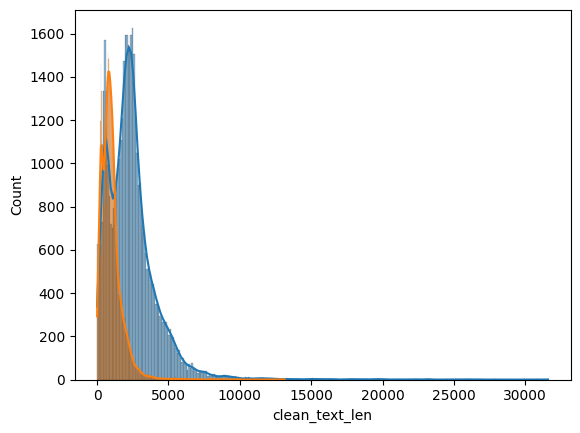

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text
sns.histplot(data=df_clean, x='clean_text_len', kde=True)

# Add histogram for lemmatized news text with POS tags removed
sns.histplot(data=df_clean, x='lemma_text_len', kde=True)


<Axes: xlabel='lemma_text_len', ylabel='Count'>

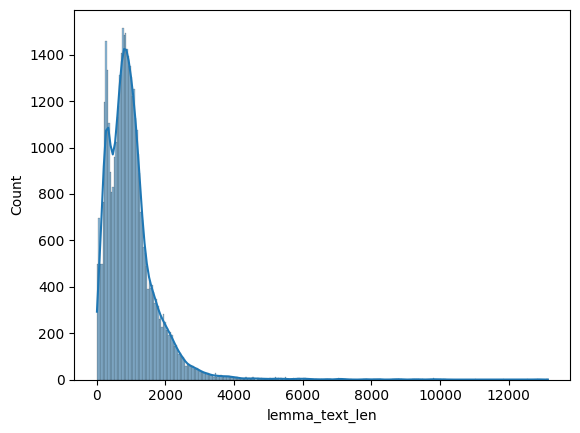

In [ ]:
# Add histogram for lemmatized news text with POS tags removed
sns.histplot(data=df_clean, x='lemma_text_len', kde=True)

### **4.2** Find and display the top 40 words by frequency among true and fake news in Training data after processing the text  <font color = red>[10 marks]</font> <br>



##### 4.2.1 Find and display the top 40 words by frequency among true news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

In [ ]:
!pip install wordcloud

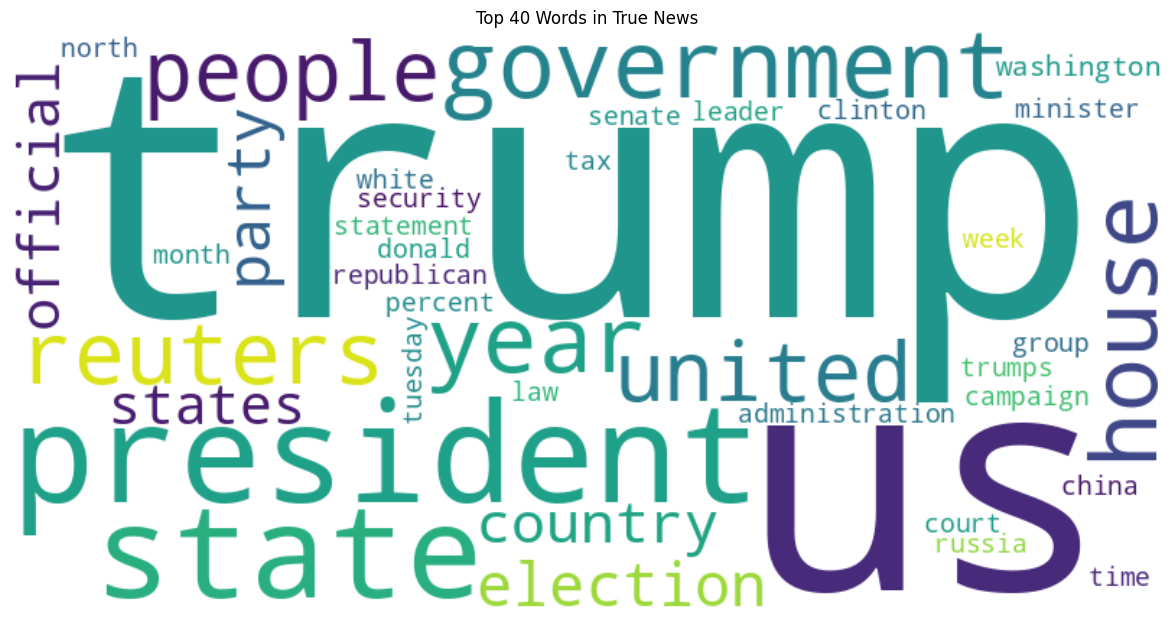



Top 40 words and their frequencies in True News:
trump: 43274
us: 31633
president: 27480
state: 24181
government: 19875
year: 18966
house: 18299
reuters: 16563
people: 15425
united: 15313
election: 14498
party: 14291
country: 13802
official: 13431
states: 12774
washington: 12546
group: 11340
campaign: 11105
leader: 11092
court: 11037
security: 10665
week: 10658
donald: 10383
minister: 10020
percent: 9967
clinton: 9902
senate: 9755
law: 9599
white: 9214
north: 9104
month: 8828
republican: 8683
administration: 8620
china: 8612
statement: 8611
time: 8579
russia: 8465
trumps: 8446
tax: 8340
tuesday: 8328


In [ ]:
## Use a word cloud find the top 40 words by frequency among true news in the training data after processing the text

from collections import Counter
from wordcloud import WordCloud

# Filter news with label 1 (True News) and convert to it string and handle any non-string values
All_Words = [wd for sent in df_clean[df_clean['news_label']==1]['lexi_text'] for wd in str(sent).split()]

word_frequencies = Counter(All_Words)

# Generate word cloud for True News
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=40, contour_width=3, contour_color='steelblue').generate_from_frequencies(word_frequencies)

# Display
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in True News")
plt.show()

print()
print("\nTop 40 words and their frequencies in True News:")
for word, freq in word_frequencies.most_common(40):
    print(f"{word}: {freq}")

##### 4.2.2 Find and display the top 40 words by frequency among fake news in Training data after processing the text  <font color = red>[5 marks]</font> <br>

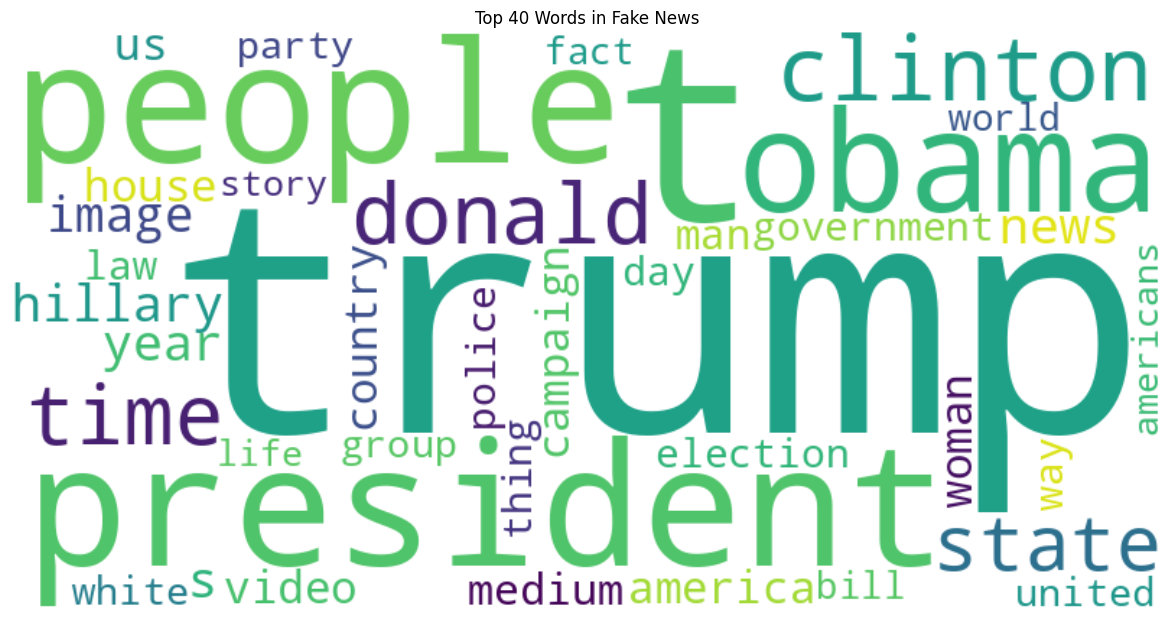



Top 40 words and their frequencies in True News:
trump: 71013
t: 36862
president: 26959
people: 26354
obama: 19647
clinton: 19386
donald: 16617
time: 16014
state: 15356
hillary: 15203
s: 14989
year: 14860
news: 14644
image: 13974
video: 11729
woman: 11599
us: 11394
campaign: 11105
house: 11104
america: 10868
country: 10828
medium: 10404
man: 9993
election: 9495
day: 9454
way: 9248
thing: 9080
government: 8974
police: 8764
law: 8736
party: 8105
white: 7860
group: 7643
united: 7592
fact: 7295
world: 7076
bill: 7019
story: 6591
life: 6488
americans: 6308


In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news in the training data after processing the text

# Filter news with label 0 (Fake News) and convert to it string and handle any non-string values
All_Words = [wd for sent in df_clean[df_clean['news_label']==0]['lexi_text'] for wd in str(sent).split()]

word_frequencies = Counter(All_Words)

# Generate word cloud for Fake News
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=40, contour_width=3, contour_color='steelblue').generate_from_frequencies(word_frequencies)

# Display
plt.figure(figsize=(15, 7.5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Top 40 Words in Fake News")
plt.show()

print()
print("\nTop 40 words and their frequencies in True News:")
for word, freq in word_frequencies.most_common(40):
    print(f"{word}: {freq}")

### **4.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  <font color = red>[20 marks]</font> <br>




##### 4.3.1 Write a function to get the specified top n-grams  <font color = red>[4 marks]</font> <br>



In [ ]:
# Write a function to get the specified top n-grams

from nltk import ngrams
from nltk.tokenize import word_tokenize

def get_top_ngrams(df, label=1, n=2, top_k=10):

    txt = ' '.join(df[df['news_label']==label]['lexi_text'].astype(str))

    # Tokenize the text into words
    tokens = word_tokenize(txt)

    # Generate n-grams
    generated_ngrams = list(ngrams(tokens, n))

    # Count the frequency of each n-gram
    ngram_counts = Counter(generated_ngrams)

    # Return the top_k most common n-grams
    formatted_ngrams = [(" ".join(gram), freq) for gram, freq in ngram_counts.most_common(top_k)]

    return formatted_ngrams

##### 4.3.2 Handle the NaN values  <font color = red>[1 mark]</font> <br>



In [ ]:
# Handle NaN values in the text data

df_clean.dropna(axis=0, inplace=True)

### For True News




##### 4.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

In [ ]:
def plot_ngrams(ngrams):

    X = [i[0] for i in ngrams]
    Y = [i[1] for i in ngrams]

    sns.barplot(x=X, y=Y)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[('trump', 43274), ('us', 31633), ('president', 27480), ('state', 24181), ('government', 19875), ('year', 18966), ('house', 18299), ('reuters', 16563), ('people', 15425), ('united', 15313)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'trump'),
  Text(1, 0, 'us'),
  Text(2, 0, 'president'),
  Text(3, 0, 'state'),
  Text(4, 0, 'government'),
  Text(5, 0, 'year'),
  Text(6, 0, 'house'),
  Text(7, 0, 'reuters'),
  Text(8, 0, 'people'),
  Text(9, 0, 'united')])

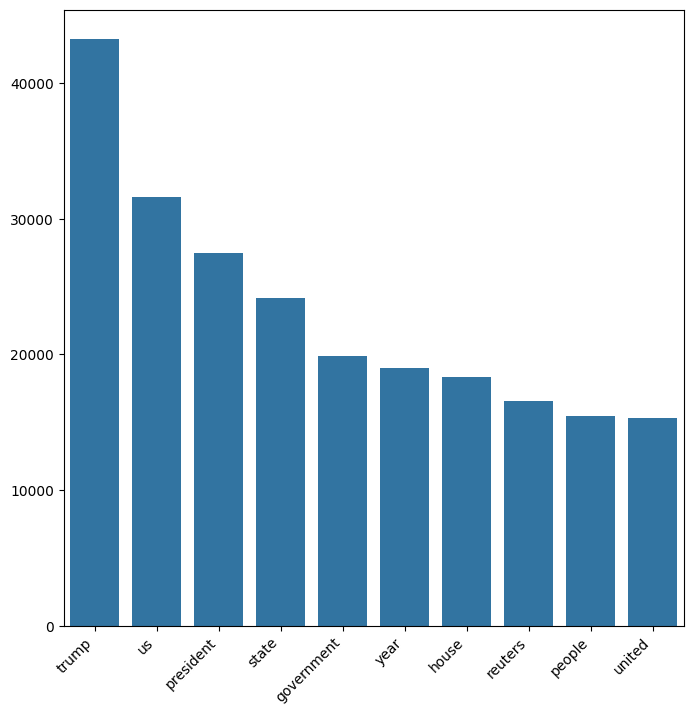

In [ ]:
# Print the top 10 unigrams by frequency in true news and plot the same using a bar graph
import nltk
nltk.download('punkt_tab')

ngrams = get_top_ngrams(df_clean, label=1, n=1, top_k=10)

print(ngrams)

plt.figure(figsize=(8, 8))
plot_ngrams(ngrams)
plt.xticks(rotation=45, ha='right')

##### 4.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



[('united states', 12207), ('white house', 9003), ('donald trump', 7694), ('north korea', 5955), ('president donald', 5936), ('washington reuters', 4851), ('new york', 4447), ('us president', 3144), ('prime minister', 3142), ('reuters us', 2644)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'united states'),
  Text(1, 0, 'white house'),
  Text(2, 0, 'donald trump'),
  Text(3, 0, 'north korea'),
  Text(4, 0, 'president donald'),
  Text(5, 0, 'washington reuters'),
  Text(6, 0, 'new york'),
  Text(7, 0, 'us president'),
  Text(8, 0, 'prime minister'),
  Text(9, 0, 'reuters us')])

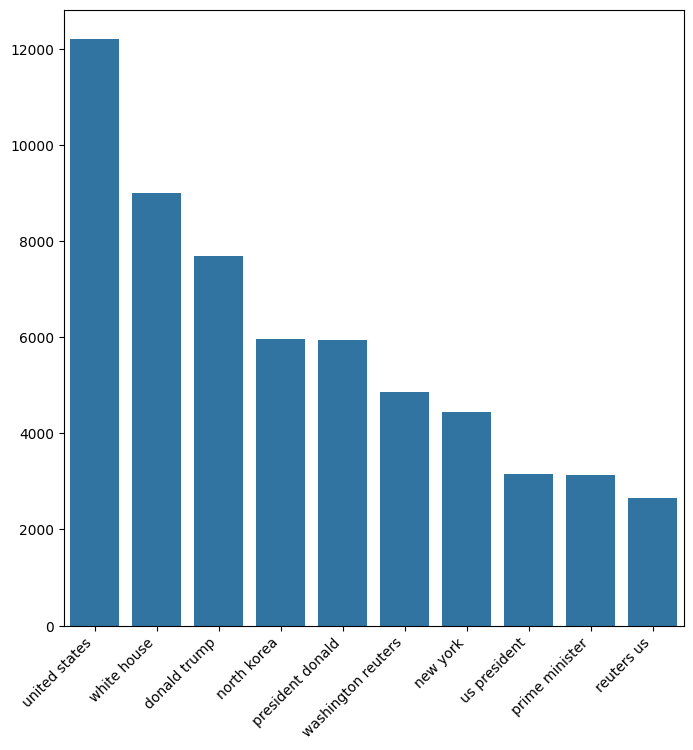

In [ ]:
# Print the top 10 bigrams by frequency in true news and plot the same using a bar graph
bigrams = get_top_ngrams(df_clean, label=1, n=2, top_k=10)

print(bigrams)

plt.figure(figsize=(8, 8))
plot_ngrams(bigrams)
plt.xticks(rotation=45, ha='right')

##### 4.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



[('president donald trump', 4383), ('us president donald', 2258), ('washington reuters us', 1933), ('president donald trumps', 1306), ('reuters us president', 809), ('president vladimir putin', 786), ('new york reuters', 742), ('washington reuters president', 696), ('reuters president donald', 660), ('us secretary state', 615)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'president donald trump'),
  Text(1, 0, 'us president donald'),
  Text(2, 0, 'washington reuters us'),
  Text(3, 0, 'president donald trumps'),
  Text(4, 0, 'reuters us president'),
  Text(5, 0, 'president vladimir putin'),
  Text(6, 0, 'new york reuters'),
  Text(7, 0, 'washington reuters president'),
  Text(8, 0, 'reuters president donald'),
  Text(9, 0, 'us secretary state')])

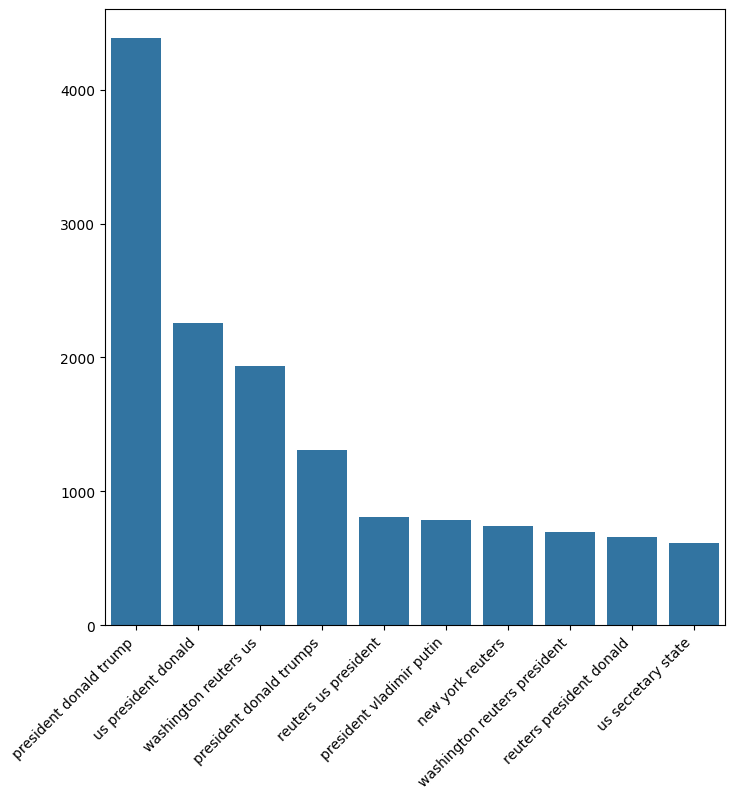

In [ ]:
# Print the top 10 trigrams by frequency in true news and plot the same using a bar graph
trigrams = get_top_ngrams(df_clean, label=1, n=3, top_k=10)

print(trigrams)

plt.figure(figsize=(8, 8))
plot_ngrams(trigrams)
plt.xticks(rotation=45, ha='right')

### For Fake News







##### 4.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>

[('trump', 71013), ('t', 36862), ('president', 26959), ('people', 26354), ('obama', 19647), ('clinton', 19386), ('donald', 16617), ('time', 16014), ('state', 15356), ('hillary', 15203)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'trump'),
  Text(1, 0, 't'),
  Text(2, 0, 'president'),
  Text(3, 0, 'people'),
  Text(4, 0, 'obama'),
  Text(5, 0, 'clinton'),
  Text(6, 0, 'donald'),
  Text(7, 0, 'time'),
  Text(8, 0, 'state'),
  Text(9, 0, 'hillary')])

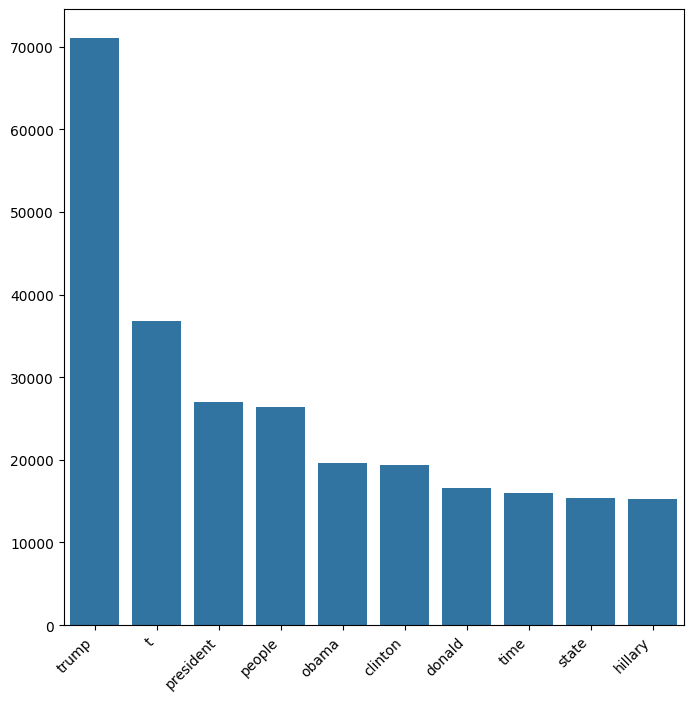

In [ ]:
# Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph
uni_fake = get_top_ngrams(df_clean, label=0, n=1, top_k=10)

print(uni_fake)

plt.figure(figsize=(8, 8))
plot_ngrams(uni_fake)
plt.xticks(rotation=45, ha='right')

##### 4.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



[('donald trump', 12626), ('hillary clinton', 6994), ('white house', 6416), ('united states', 6071), ('didn t', 5167), ('president obama', 4840), ('don t', 4730), ('new york', 4213), ('president trump', 3428), ('fox news', 3328)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'donald trump'),
  Text(1, 0, 'hillary clinton'),
  Text(2, 0, 'white house'),
  Text(3, 0, 'united states'),
  Text(4, 0, 'didn t'),
  Text(5, 0, 'president obama'),
  Text(6, 0, 'don t'),
  Text(7, 0, 'new york'),
  Text(8, 0, 'president trump'),
  Text(9, 0, 'fox news')])

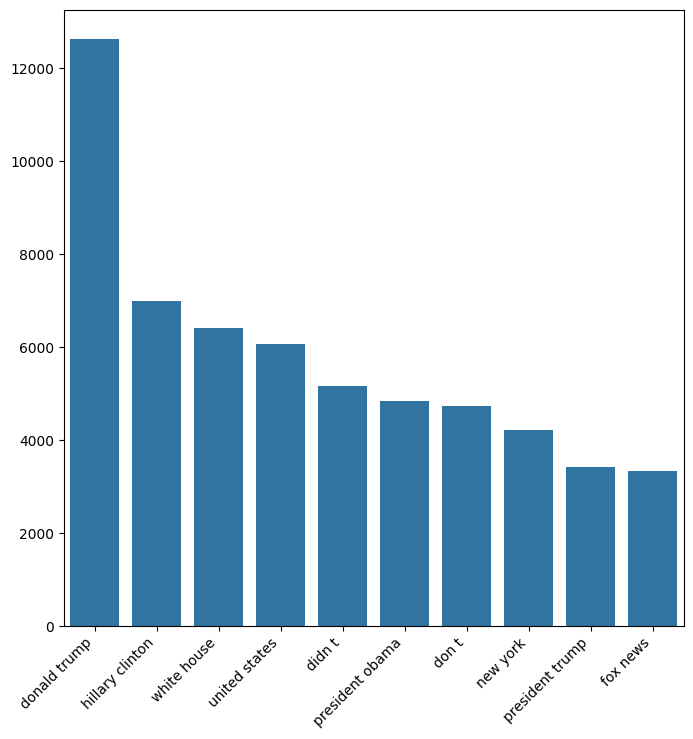

In [ ]:
# Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph
bi_fake = get_top_ngrams(df_clean, label=0, n=2, top_k=10)

print(bi_fake)

plt.figure(figsize=(8, 8))
plot_ngrams(bi_fake)
plt.xticks(rotation=45, ha='right')

##### 4.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph  <font color = red>[2.5 marks]</font> <br>



[('j trump realdonaldtrump', 1692), ('donald j trump', 1655), ('new york times', 1452), ('news century wire', 943), ('president united states', 911), ('president donald trump', 879), ('video screen capture', 728), ('image video screen', 684), ('new york city', 613), ('george w bush', 579)]


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'j trump realdonaldtrump'),
  Text(1, 0, 'donald j trump'),
  Text(2, 0, 'new york times'),
  Text(3, 0, 'news century wire'),
  Text(4, 0, 'president united states'),
  Text(5, 0, 'president donald trump'),
  Text(6, 0, 'video screen capture'),
  Text(7, 0, 'image video screen'),
  Text(8, 0, 'new york city'),
  Text(9, 0, 'george w bush')])

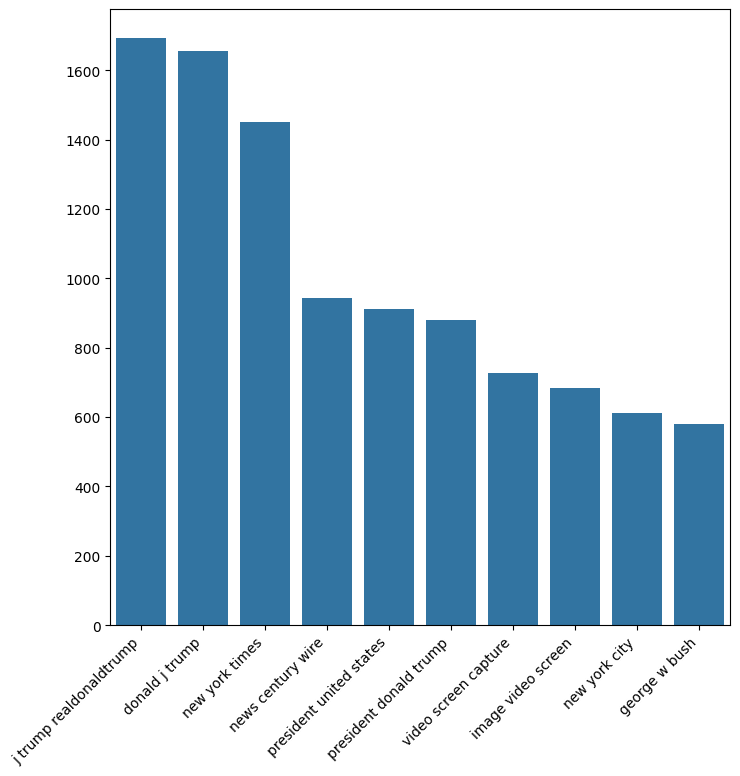

In [ ]:
# Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph
tri_fake = get_top_ngrams(df_clean, label=0, n=3, top_k=10)

print(tri_fake)

plt.figure(figsize=(8, 8))
plot_ngrams(tri_fake)
plt.xticks(rotation=45, ha='right')

## **5.** Exploratory Data Analysis on Validation Data [Optional]

Perform EDA on validation data to differentiate EDA on training data with EDA on validation data and the tasks are given below:

<ul>
  <li> Visualise the data according to the character length of cleaned news text and lemmatized text with POS tags removed
  <li> Using a word cloud find the top 40 words by frequency in true and fake news separately
  <li> Find the top unigrams, bigrams and trigrams by frequency in true and fake news separately
</ul>





### **5.1** Visualise character lengths of cleaned news text and lemmatized news text with POS tags removed

##### 5.1.1  Add new columns to calculate the character lengths of the processed data columns

In [ ]:
# Add a new column to calculate the character length of cleaned news text

# Add a new column to calculate the character length of lemmatized news text with POS tags removed


##### 5.1.2  Create Histogram to visualise character lengths

Plot both distributions on the same graph for comparison and to observe overlaps and peak differences to understand text preprocessing's impact on text length.

In [ ]:
# Create a histogram plot to visualise character lengths

# Add histogram for cleaned news text

# Add histogram for lemmatized news text with POS tags removed


### **5.2** Find and display the top 40 words by frequency among true and fake news after processing the text

##### 5.2.1  Find and display the top 40 words by frequency among true news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among true news after processing the text

# Generate word cloud for True News


##### 5.2.2  Find and display the top 40 words by frequency among fake news in validation data after processing the text

In [ ]:
## Use a word cloud find the top 40 words by frequency among fake news after processing the text

# Generate word cloud for Fake News


### **5.3** Find and display the top unigrams, bigrams and trigrams by frequency in true news and fake news after processing the text  





##### 5.3.1 Write a function to get the specified top n-grams

In [ ]:
## Write a function to get the specified top n-grams


##### 5.3.2 Handle the NaN values

In [ ]:
## First handle NaN values in the text data


### For True News



##### 5.3.3 Display the top 10 unigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in true news and plot the same using a bar graph


##### 5.3.4 Display the top 10 bigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in true news and plot the same using a bar graph


##### 5.3.5 Display the top 10 trigrams by frequency in true news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in true news and plot the same using a bar graph


### For Fake News

##### 5.3.6 Display the top 10 unigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 unigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.7 Display the top 10 bigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 bigrams by frequency in fake news and plot the same using a bar graph


##### 5.3.8 Display the top 10 trigrams by frequency in fake news and plot them as a bar graph

In [ ]:
## Print the top 10 trigrams by frequency in fake news and plot the same using a bar graph


## **6.** Feature Extraction  <font color = red>[10 marks]</font> <br>

For any ML model to perform classification on textual data, you need to convert it to a vector form. In this assignment, you will use the Word2Vec Vectorizer to create vectors from textual data. Word2Vec model captures the semantic relationship between words.


### **6.1** Initialise Word2Vec model  <font color = red>[2 marks]</font>

In [ ]:
## Write your code here to initialise the Word2Vec model by downloading "word2vec-google-news-300"
!pip install gensim
import gensim.downloader as api

# Download and load the Word2Vec Google News 300 model
model = api.load("word2vec-google-news-300")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 84.3 MB/s eta 0:00:00
[==================================================] 100.0% 1662.8/1662.8MB downloaded


### **6.2** Extract vectors for cleaned news data   <font color = red>[8 marks]</font>

In [ ]:
## Write your code here to extract the vectors from the Word2Vec model for both training and validation data
!pip install tensorflow
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

tokenizer = Tokenizer()

tokenizer.fit_on_texts(X_train['lexi_text'].astype(str).tolist())

train_sequences = tokenizer.texts_to_sequences(X_train['lexi_text'].astype(str).tolist())
test_sequences = tokenizer.texts_to_sequences(X_test['lexi_text'].astype(str).tolist())

Max_Seq_Len = max([max(map(len, train_sequences)), max(map(len, test_sequences))])

## Extract the target variable for the training data and validation data
train_data = pad_sequences(train_sequences, maxlen=Max_Seq_Len, padding='pre')
test_data = pad_sequences(test_sequences, maxlen=Max_Seq_Len, padding='pre')

# Create an embedding matrix
word_index = tokenizer.word_index
embedding_dim = model.vector_size # Get the dimension from the loaded Word2Vec model
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim)) # +1 to account for padding or out of vocab

for word, i in word_index.items():
    if word in model:
        embedding_matrix[i] = model[word]

def sequences_to_vectors(sequences):

    sequence_vectors = []
    for seq in sequences:
        sequence_vectors.append(embedding_matrix[seq])

    sequence_vectors = np.mean(np.array(sequence_vectors), axis=0)
    return sequence_vectors

X_train_vec = np.array([sequences_to_vectors(seq) for seq in train_data])
X_test_vec = np.array([sequences_to_vectors(seq) for seq in test_data])

In [ ]:
print(embedding_matrix.shape)
print(X_train_vec.shape)
print(X_test_vec.shape)

(117420, 300)
(31428, 300)
(13470, 300)


## **7.** Model Training and Evaluation <font color = red>[45 marks]</font>

You will use a set of supervised models to classify the news into true or fake.

### **7.0** Import models and evaluation metrics

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report

### **7.1** Build Logistic Regression Model  <font color = red>[15 marks]</font>

##### 7.1.1 Create and train logistic regression model on training data  <font color = red>[10 marks]</font>

In [ ]:
## Initialise Logistic Regression model
LogReg = LogisticRegression()
## Train Logistic Regression model on training data
LogReg.fit(X_train_vec, y_train)
## Predict on validation data
y_pred = LogReg.predict(X_test_vec)

##### 7.1.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print(f'The accuracy is : {accuracy_score(y_test, y_pred)}')
print(f'The precision is : {precision_score(y_test, y_pred)}')
print(f'The recall is : {recall_score(y_test, y_pred)}')
print(f'The f1-score is : {f1_score(y_test, y_pred)}')

The accuracy is : 0.8429844097995546
The precision is : 0.8787346221441125
The recall is : 0.7782101167315175
The f1-score is : 0.8254230293025175


In [ ]:
# Classification Report
print('The Classification report is')
print(classification_report(y_pred,y_test))

The Classification report is
              precision    recall  f1-score   support

           0       0.90      0.82      0.86      7780
           1       0.78      0.88      0.83      5690

    accuracy                           0.84     13470
   macro avg       0.84      0.85      0.84     13470
weighted avg       0.85      0.84      0.84     13470



### **7.2** Build Decision Tree Model <font color = red>[15 marks]</font>

##### 7.2.1 Create and train a decision tree model on training data <font color = red>[10 marks]</font>

In [ ]:
## Initialise Decision Tree model
DT = DecisionTreeClassifier()
## Train Decision Tree model on training data
DT.fit(X_train_vec, y_train)
## Predict on validation data
y_pred = DT.predict(X_test_vec)

##### 7.2.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print(f'The accuracy is :{accuracy_score(y_pred,y_test)}')
print(f'The precision is :{precision_score(y_pred,y_test)}')
print(f'The recall is :{recall_score(y_pred,y_test)}')
print(f'The f1-score is :{f1_score(y_pred,y_test)}')

The accuracy is :0.8623608017817372
The precision is :0.8459143968871595
The recall is :0.8628353706937609
The f1-score is :0.8542911034265954


In [ ]:
# Classification Report
print('The Classification report is')
print(classification_report(y_pred,y_test))

The Classification report is
              precision    recall  f1-score   support

           0       0.88      0.86      0.87      7171
           1       0.85      0.86      0.85      6299

    accuracy                           0.86     13470
   macro avg       0.86      0.86      0.86     13470
weighted avg       0.86      0.86      0.86     13470



### **7.3** Build Random Forest Model <font color = red>[15 marks]</font>


##### 7.3.1 Create and train a random forest model on training data <font color = red>[10 marks]</font>

In [ ]:
## Initialise Random Forest model
RF=RandomForestClassifier()
## Train Random Forest model on training data
RF.fit(X_train_vec, y_train)
## Predict on validation data
y_pred = RF.predict(X_test_vec)

 ##### 7.3.2 Calculate and print accuracy, precision, recall and f1-score on validation data <font color = red>[5 marks]</font>

In [ ]:
## Calculate and print accuracy, precision, recall, f1-score on predicted labels
print(f'The accuracy is :{accuracy_score(y_pred,y_test)}')
print(f'The precision is :{precision_score(y_pred,y_test)}')
print(f'The recall is :{recall_score(y_pred,y_test)}')
print(f'The f1-score is :{f1_score(y_pred,y_test)}')

The accuracy is :0.9325909428359317
The precision is :0.9248249027237354
The recall is :0.9332495680854406
The f1-score is :0.9290181363352095


In [ ]:
# Classification Report
print('The Classification report is')
print(classification_report(y_pred,y_test))

The Classification report is
              precision    recall  f1-score   support

           0       0.94      0.93      0.94      7103
           1       0.92      0.93      0.93      6367

    accuracy                           0.93     13470
   macro avg       0.93      0.93      0.93     13470
weighted avg       0.93      0.93      0.93     13470



## **8.** Conclusion <font color = red>[5 marks]</font>

Summarise your findings by discussing patterns observed in true and fake news and how semantic classification addressed the problem. Highlight the best model chosen, the evaluation metric prioritised for the decision, and assess the approach and its impact.

1. We observed clear differences between true and fake news. True news often used formal and factual words like "said", "president", and "reuters", while fake news included more informal or personal words like "you", "we", and "i". This showed that fake news has a different writing style and tone.

2. The use of Word2Vec helped in capturing these differences by understanding the context and relationships between words, rather than just their frequency. This allowed the models to better learn how real and fake news use language differently.

3. Out of all the models tested, the Random Forest model performed the best, achieving 93% accuracy with a good balance between precision and recall. This made it reliable in detecting both real and fake news. Compared to Logistic Regression (84%) and Decision Tree (86%), Random Forest showed better generalization and higher reliability in identifying fake content.

4. Overall, using semantic word understanding and a strong model like Random Forest made the fake news detection system more accurate and useful.
